In [2]:
%pip install pandas
%pip install matplotlib
%pip install pyarrow
%pip install dask
%pip install dask-expr

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho base onde os arquivos estão armazenados
base_path = '/Users/ariel/Documents/hackathon-petro/dataset/'
output_path = '/Users/ariel/Documents/hackathon-petro/dataset-parcial/'


In [7]:
# Função para processar os arquivos de cada subdiretório e salvar o resultado
def process_directory(folder_path, output_file):
    dataframes = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.parquet'):
            file_path = os.path.join(folder_path, file_name)
            
            # Carregar o arquivo Parquet
            df = pd.read_parquet(file_path, engine='pyarrow')
            
            # Verificar se há dados no arquivo
            if df.empty:
                print(f"O arquivo {file_name} está vazio.")
            else:
                print(f"Arquivo {file_name} carregado com sucesso.")
            
            # Adicionar o DataFrame à lista de DataFrames
            dataframes.append(df)

    # Concatenar todos os DataFrames da pasta (se houver mais de um arquivo)
    if dataframes:
        df_concat = pd.concat(dataframes, ignore_index=True)
        df_concat.to_parquet(output_file, engine='pyarrow')  # Salvar em disco
        print(f"Dados salvos em {output_file}")
    else:
        print(f"Nenhum dado válido encontrado na pasta {folder_path}")


In [13]:
# Processar diretório por diretório (subdiretórios de 0 a 9) e salvar em disco
for i in range(10):  # Supondo subdiretórios de 0 a 9
    folder_path = os.path.join(base_path, str(i))
    output_file = os.path.join(output_path, f"dataset_parcial_{i}.parquet")
    print(f"Processando diretório {folder_path}")
    
    # Processar a pasta e salvar os dados parciais em disco
    process_directory(folder_path, output_file)

print("Todos os diretórios foram processados e os resultados parciais foram salvos.")


Processando diretório /Users/ariel/Documents/hackathon-petro/dataset/0
Arquivo WELL-00002_20170809150026.parquet carregado com sucesso.
Arquivo WELL-00002_20170615180127.parquet carregado com sucesso.
Arquivo WELL-00001_20170824000000.parquet carregado com sucesso.
Arquivo WELL-00006_20170822020000.parquet carregado com sucesso.
Arquivo WELL-00001_20170823190000.parquet carregado com sucesso.
Arquivo WELL-00005_20170516070038.parquet carregado com sucesso.
Arquivo WELL-00006_20170824090000.parquet carregado com sucesso.
Arquivo WELL-00002_20170617210127.parquet carregado com sucesso.
Arquivo WELL-00002_20170809000000.parquet carregado com sucesso.
Arquivo WELL-00008_20170816230146.parquet carregado com sucesso.
Arquivo WELL-00002_20170812080000.parquet carregado com sucesso.
Arquivo WELL-00005_20170516160000.parquet carregado com sucesso.
Arquivo WELL-00001_20170522000000.parquet carregado com sucesso.
Arquivo WELL-00005_20170813130000.parquet carregado com sucesso.
Arquivo WELL-00002_

In [12]:
# Carregar um arquivo parcial salvo
partial_file_path = '/Users/ariel/Documents/hackathon-petro/dataset-parcial/dataset_parcial_4.parquet'
df_partial = pd.read_parquet(partial_file_path, engine='pyarrow')

# Realizar análise no arquivo parcial
df_partial.describe()

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,PT-P,P-TPT,QBS,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT,class,state
count,1.202935e+06,1.202607e+06,1.369481e+06,1369481.0,1.369481e+06,1369481.0,1.614419e+06,2.215673e+06,1594612.0,1.369481e+06,...,0.0,2.797419e+06,0.0,723857.000000,1.593676e+06,0.0,2.076473e+06,3.688428e+06,2454883.0,2454883.0
mean,1.823886e+01,3.188962e+01,7.018506e-01,1.0,7.860715e-02,0.0,6.910913e-01,9.125575e-01,1.0,2.902866e-01,...,NaN,1.633869e+07,NaN,0.499230,6.253302e+01,NaN,6.806527e+01,9.524491e+01,4.0,0.0
std,3.809143e+01,5.308040e+00,4.574456e-01,0.0,2.691247e-01,0.0,4.620435e-01,2.824825e-01,0.0,4.538948e-01,...,NaN,2.450508e+06,NaN,0.752809,1.106161e+01,NaN,2.829639e+01,2.645290e+01,0.0,0.0
min,0.000000e+00,2.756992e+01,0.000000e+00,1.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.0,0.000000e+00,...,NaN,9.478219e+06,NaN,0.000000,3.710000e+01,NaN,0.000000e+00,5.570294e+01,4.0,0.0
25%,0.000000e+00,2.817159e+01,0.000000e+00,1.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00,1.0,0.000000e+00,...,NaN,1.449221e+07,NaN,0.000000,6.573509e+01,NaN,6.175174e+01,5.888000e+01,4.0,0.0
50%,0.000000e+00,2.944436e+01,1.000000e+00,1.0,0.000000e+00,0.0,1.000000e+00,1.000000e+00,1.0,0.000000e+00,...,NaN,1.629681e+07,NaN,0.000000,6.751004e+01,NaN,6.873859e+01,1.065414e+02,4.0,0.0
75%,0.000000e+00,3.269447e+01,1.000000e+00,1.0,0.000000e+00,0.0,1.000000e+00,1.000000e+00,1.0,1.000000e+00,...,NaN,1.685074e+07,NaN,1.433153,6.884653e+01,NaN,9.000000e+01,1.175749e+02,4.0,0.0
max,1.000000e+02,4.295526e+01,1.000000e+00,1.0,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.0,1.000000e+00,...,NaN,2.088880e+07,NaN,2.436142,7.084090e+01,NaN,1.147639e+02,1.182390e+02,4.0,0.0


In [2]:
import os
import pandas as pd

# Caminho para a pasta onde os arquivos Parquet estão
final_output_folder = '/Users/ariel/Documents/hackathon-petro/dataset-parcial/'
output_file = '/Users/ariel/Documents/hackathon-petro/dataset_merged.csv'

# Verificar se o arquivo CSV final já existe para saber se devemos criar ou anexar
if not os.path.exists(output_file):
    first_chunk = True
else:
    first_chunk = False

# Processar cada arquivo Parquet individualmente e salvar diretamente em CSV
for file_name in os.listdir(final_output_folder):
    if file_name.endswith('.parquet'):
        file_path = os.path.join(final_output_folder, file_name)
        
        # Carregar o arquivo Parquet
        df = pd.read_parquet(file_path, engine='pyarrow')
        print(f"Processando arquivo {file_name} com {len(df)} linhas.")
        
        # Escrever no arquivo CSV. O primeiro arquivo cria o CSV, os próximos anexam.
        if first_chunk:
            df.to_csv(output_file, mode='w', header=True, index=False)
            first_chunk = False
        else:
            df.to_csv(output_file, mode='a', header=False, index=False)

        # Limpar o DataFrame da memória
        del df
        print(f"Arquivo {file_name} processado e salvo.")

print(f"Todos os arquivos foram processados e o dataset completo foi salvo em {output_file}.")


Processando arquivo dataset_parcial_0.parquet com 12158183 linhas.
Arquivo dataset_parcial_0.parquet processado e salvo.
Processando arquivo dataset_parcial_9.parquet com 9481227 linhas.
Arquivo dataset_parcial_9.parquet processado e salvo.
Processando arquivo dataset_parcial_8.parquet com 6995955 linhas.
Arquivo dataset_parcial_8.parquet processado e salvo.
Processando arquivo dataset_parcial_1.parquet com 9107107 linhas.
Arquivo dataset_parcial_1.parquet processado e salvo.
Processando arquivo dataset_parcial_3.parquet com 4949279 linhas.
Arquivo dataset_parcial_3.parquet processado e salvo.
Processando arquivo dataset_parcial_2.parquet com 737785 linhas.
Arquivo dataset_parcial_2.parquet processado e salvo.
Processando arquivo dataset_parcial_7.parquet com 10284155 linhas.
Arquivo dataset_parcial_7.parquet processado e salvo.
Processando arquivo dataset_parcial_6.parquet com 5882267 linhas.
Arquivo dataset_parcial_6.parquet processado e salvo.
Processando arquivo dataset_parcial_4.p

In [4]:
import dask.dataframe as dd
# Caminho para o arquivo Parquet de saída
output_file = '/Users/ariel/Documents/hackathon-petro/dataset_merged.csv'
parquet_output_file = '/Users/ariel/Documents/hackathon-petro/dataset_merged.parquet'

# Ler o CSV grande usando Dask
ddf = dd.read_csv(output_file)

# Converter o DataFrame Dask para Parquet
ddf.to_parquet(parquet_output_file, engine='pyarrow', compression='snappy')

print(f"Arquivo CSV convertido para Parquet e salvo em: {parquet_output_file}")

Arquivo CSV convertido para Parquet e salvo em: /Users/ariel/Documents/hackathon-petro/dataset_merged.parquet


In [2]:
import dask.dataframe as dd
import pandas as pd

# Caminho para a pasta onde o Dask salvou os arquivos Parquet
parquet_folder = '/Users/ariel/Documents/hackathon-petro/dataset_merged.parquet/'

# Carregar todos os arquivos Parquet como um único DataFrame Dask
ddf = dd.read_parquet(parquet_folder, engine='pyarrow')

# Realizar operações (por exemplo, descrever estatísticas básicas)
df_describe = ddf.describe().compute()  # Executa a operação de forma preguiçosa e computa
df_describe

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,PT-P,P-TPT,QBS,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT,class,state
count,8.491513e+06,1.232646e+07,1.386540e+07,1.777320e+07,1.768828e+07,1.817620e+07,1.710527e+07,2.431611e+07,1.893804e+07,1.829346e+07,...,0.0,7.120554e+07,0.0,2.456596e+07,6.055442e+07,2.361760e+07,2.081127e+07,6.632528e+07,7.255892e+07,7.255892e+07
mean,1.931843e+01,4.052591e+01,5.703575e-01,8.532889e-01,3.172376e-01,8.822910e-03,5.448040e-01,9.110019e-01,7.026502e-01,2.407879e-01,...,NaN,1.475171e+07,NaN,1.304284e+00,6.926203e+01,7.050837e+01,-2.514042e+36,9.288587e+01,4.013590e+01,1.075884e-01
std,3.040067e+01,3.259661e+01,4.950251e-01,3.538177e-01,4.653943e-01,9.351506e-02,4.979886e-01,2.847410e-01,4.570918e-01,4.275589e-01,...,NaN,5.519086e+07,NaN,1.541538e+00,1.902977e+01,3.216803e+01,2.059093e+37,3.685615e+01,4.950594e+01,7.190552e-01
min,0.000000e+00,-9.999000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,-1.712930e+07,NaN,-5.417673e+01,-1.139319e+01,-9.999000e+01,-1.711613e+38,-3.375000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.910653e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,NaN,1.138003e+07,NaN,0.000000e+00,6.532548e+01,7.953502e+01,0.000000e+00,9.408343e+01,3.000000e+00,0.000000e+00
50%,0.000000e+00,4.066984e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,NaN,1.580917e+07,NaN,1.597522e+00,7.846245e+01,8.663010e+01,4.888887e+01,1.158322e+02,9.000000e+00,0.000000e+00
75%,4.500000e+01,4.359884e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,NaN,2.037720e+07,NaN,2.651427e+00,8.514281e+01,9.217144e+01,7.716244e+01,1.206225e+02,1.070000e+02,0.000000e+00
max,1.000000e+02,1.004375e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,NaN,2.941990e+09,NaN,7.297315e+00,1.111957e+02,1.112300e+02,3.000000e+04,1.277401e+02,1.090000e+02,8.000000e+00


Estrutura do dataset:
ABER-CKGL        float64
ABER-CKP         float64
ESTADO-DHSV      float64
ESTADO-M1        float64
ESTADO-M2        float64
ESTADO-PXO       float64
ESTADO-SDV-GL    float64
ESTADO-SDV-P     float64
ESTADO-W1        float64
ESTADO-W2        float64
ESTADO-XO        float64
P-ANULAR         float64
P-JUS-BS         float64
P-JUS-CKGL       float64
P-JUS-CKP        float64
P-MON-CKGL       float64
P-MON-CKP        float64
P-MON-SDV-P      float64
P-PDG            float64
PT-P             float64
P-TPT            float64
QBS              float64
QGL              float64
T-JUS-CKP        float64
T-MON-CKP        float64
T-PDG            float64
T-TPT            float64
class            float64
state            float64
dtype: object

Dimensões do dataset: 76587318 linhas e 29 colunas

Estatísticas descritivas:
          ABER-CKGL      ABER-CKP   ESTADO-DHSV     ESTADO-M1     ESTADO-M2  \
count  8.491513e+06  1.232646e+07  1.386540e+07  1.777320e+07  1.768828e+07   
me

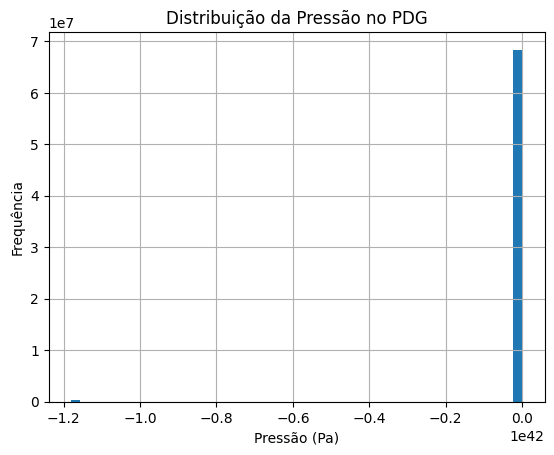


Distribuição dos eventos (coluna 'class'):
class
0.0      17305269
2.0        366858
101.0     5265821
106.0     1558565
7.0        138148
9.0       3203605
107.0     8714480
109.0     2967445
1.0       2909887
3.0       4834079
5.0      10553279
108.0     5093397
102.0      146691
105.0     2423367
6.0       3879083
8.0        744061
4.0       2454883
Name: count, dtype: int64


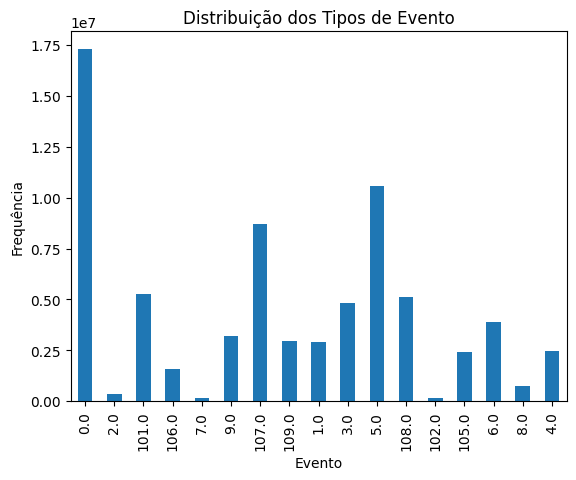

In [4]:
import os
import matplotlib.pyplot as plt

# 1. Verificar a estrutura e os tipos de dados
print("Estrutura do dataset:")
print(ddf.dtypes)

# 2. Obter o número de linhas e colunas (lazy)
print(f"\nDimensões do dataset: {ddf.shape[0].compute()} linhas e {ddf.shape[1]} colunas")

# 3. Estatísticas descritivas básicas (lazy)
print("\nEstatísticas descritivas:")
df_describe = ddf.describe().compute()
print(df_describe)

# 4. Visualização inicial de uma variável (exemplo: 'P-PDG', caso exista no dataset)
if 'P-PDG' in ddf.columns:
    ddf['P-PDG'].compute().hist(bins=50)
    plt.title('Distribuição da Pressão no PDG')
    plt.xlabel('Pressão (Pa)')
    plt.ylabel('Frequência')
    plt.show()
else:
    print("A coluna 'P-PDG' não foi encontrada.")

# 5. Visualizar a distribuição dos eventos (exemplo: coluna 'class', se existir)
if 'class' in ddf.columns:
    df_class_distribution = ddf['class'].value_counts().compute()
    print("\nDistribuição dos eventos (coluna 'class'):")
    print(df_class_distribution)

    df_class_distribution.plot(kind='bar')
    plt.title('Distribuição dos Tipos de Evento')
    plt.xlabel('Evento')
    plt.ylabel('Frequência')
    plt.show()
else:
    print("A coluna 'class' não foi encontrada.")

In [5]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Estrutura do dataset:
ABER-CKGL        float64
ABER-CKP         float64
ESTADO-DHSV      float64
ESTADO-M1        float64
ESTADO-M2        float64
ESTADO-PXO       float64
ESTADO-SDV-GL    float64
ESTADO-SDV-P     float64
ESTADO-W1        float64
ESTADO-W2        float64
ESTADO-XO        float64
P-ANULAR         float64
P-JUS-BS         float64
P-JUS-CKGL       float64
P-JUS-CKP        float64
P-MON-CKGL       float64
P-MON-CKP        float64
P-MON-SDV-P      float64
P-PDG            float64
PT-P             float64
P-TPT            float64
QBS              float64
QGL              float64
T-JUS-CKP        float64
T-MON-CKP        float64
T-PDG            float64
T-TPT            float64
class            float64
state            float64
dtype: object

Estatísticas descritivas:
          ABER-CKGL      ABER-CKP   ESTADO-DHSV     ESTADO-M1     ESTADO-M2  \
count  8.491513e+06  1.232646e+07  1.386540e+07  1.777320e+07  1.768828e+07   
mean   1.931843e+01  4.052591e+01  5.703575e-01  8.532

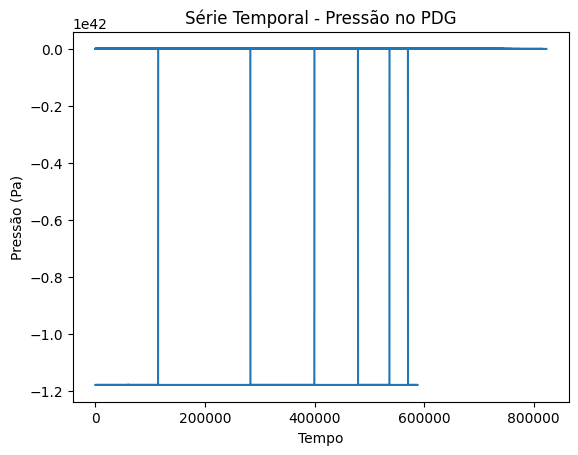


Distribuição dos eventos:
class
0.0      17305269
2.0        366858
101.0     5265821
106.0     1558565
7.0        138148
9.0       3203605
107.0     8714480
109.0     2967445
1.0       2909887
3.0       4834079
5.0      10553279
108.0     5093397
102.0      146691
105.0     2423367
6.0       3879083
8.0        744061
4.0       2454883
Name: count, dtype: int64


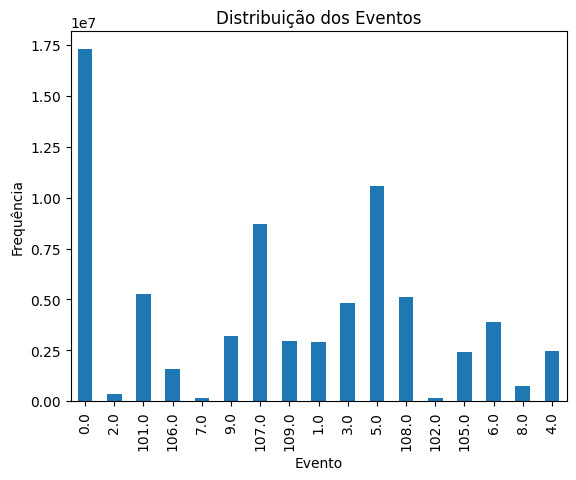

/Users/ariel/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


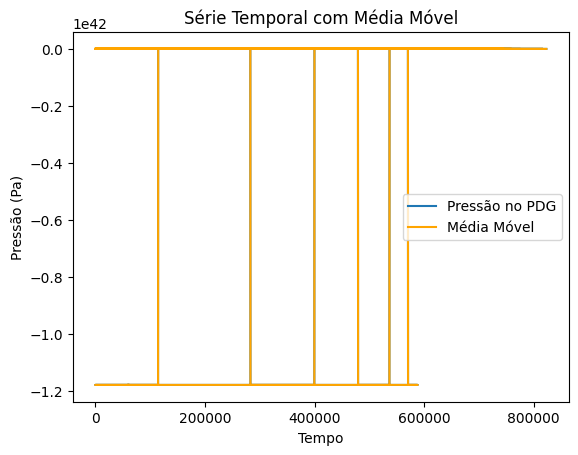

In [6]:
# Carregar todos os arquivos Parquet como um único DataFrame Dask
ddf = dd.read_parquet(parquet_folder, engine='pyarrow')

# 1. Verificar a estrutura dos dados (como no notebook)
print("Estrutura do dataset:")
print(ddf.dtypes)

# 2. Visualizar estatísticas básicas dos dados (sem computar o dataframe inteiro)
print("\nEstatísticas descritivas:")
print(ddf.describe().compute())

# 3. Visualização de séries temporais (exemplo: 'P-PDG', pressão)
if 'P-PDG' in ddf.columns:
    ddf['P-PDG'].compute().plot()
    plt.title('Série Temporal - Pressão no PDG')
    plt.xlabel('Tempo')
    plt.ylabel('Pressão (Pa)')
    plt.show()
else:
    print("Coluna 'P-PDG' não encontrada.")

# 4. Identificação e visualização de eventos anômalos (exemplo: coluna 'class', se disponível)
if 'class' in ddf.columns:
    # Verificar os eventos e contar a frequência
    event_counts = ddf['class'].value_counts().compute()
    print("\nDistribuição dos eventos:")
    print(event_counts)

    # Visualizar a distribuição dos eventos
    event_counts.plot(kind='bar')
    plt.title('Distribuição dos Eventos')
    plt.xlabel('Evento')
    plt.ylabel('Frequência')
    plt.show()
else:
    print("Coluna 'class' não encontrada.")

# 5. Cálculo de estatísticas adicionais (exemplo de cálculo de média móvel de uma variável)
if 'P-PDG' in ddf.columns:
    df_pd = ddf['P-PDG'].compute()

    # Cálculo da média móvel (adaptado do notebook)
    moving_avg = df_pd.rolling(window=50).mean()
    
    # Plotar a série temporal original e a média móvel
    plt.plot(df_pd, label='Pressão no PDG')
    plt.plot(moving_avg, label='Média Móvel', color='orange')
    plt.legend()
    plt.title('Série Temporal com Média Móvel')
    plt.xlabel('Tempo')
    plt.ylabel('Pressão (Pa)')
    plt.show()
else:
    print("Coluna 'P-PDG' não encontrada.")

In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np